# Imports

In [633]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit

# Extracting Data

In [634]:
position = {
    "t": [],
    "x": [],
    "y": [],
    "z": [],
}
 
f = open("Calibration/Cal.a", "r")
headerLen = 10

for l, line in enumerate(f):        
        if l >= headerLen:         
            part = line.split()
            position["t"].append(float(part[0]))
            position["x"].append(float(part[1]))
            position["y"].append(float(part[2]))
            position["z"].append(float(part[3]))
f.close()

for d in position:
    position[d] = np.array(position[d])
        
df = pd.DataFrame(position)
print(df)

              t    x     y     z
0          28.7 -4.5  89.8  28.3
1          47.5 -4.0  89.6  28.2
2          65.9 -3.9  89.4  27.9
3          83.9 -4.0  89.3  28.3
4         101.9 -3.1  89.2  27.7
...         ...  ...   ...   ...
30605  614414.9  5.1  86.8  31.6
30606  614434.1  5.3  86.7  32.1
30607  614453.4  6.0  86.4  32.3
30608  614473.9  5.3  86.9  32.3
30609  614494.2  5.9  87.0  32.7

[30610 rows x 4 columns]


# Plotting x, y and z components as function of time

By plotting the the spatial components as function of time, we can determine which component is vertical, more precisely we can determine which component is the axis of rotation.

NOTE: The axis of rotation will be constant as a function of time

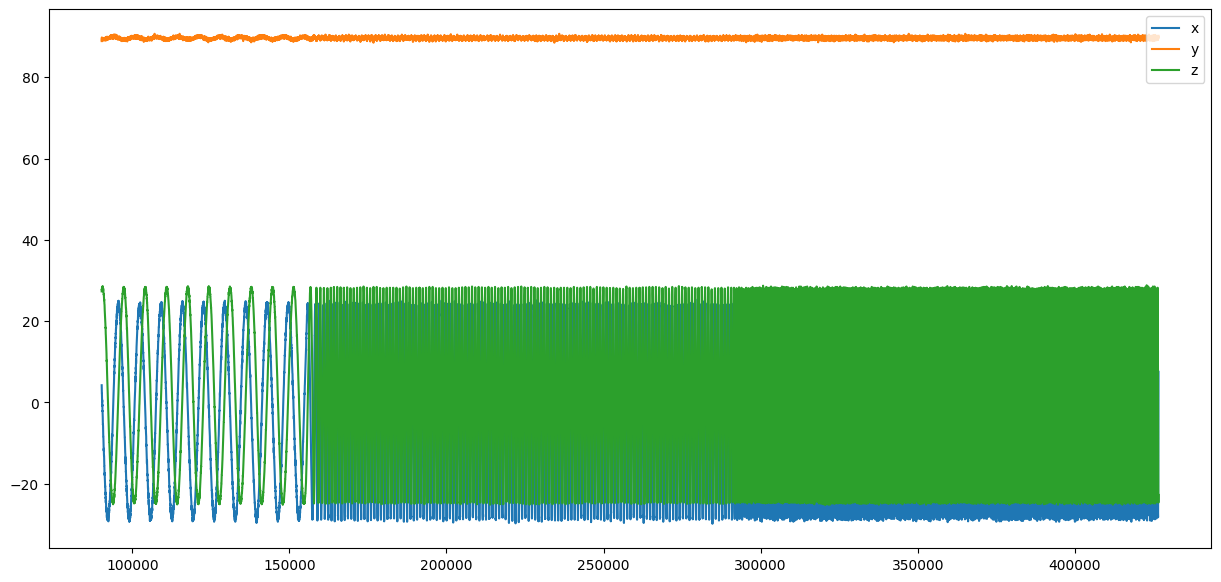

In [635]:
fig, ax = plt.subplots(figsize=(15,7))
for key in df.keys():
    if (key != "t"):
        ax.plot(df["t"][5000:24000], df[key][5000:24000], label = key)

plt.legend(loc = "upper right")
plt.show()

# Selecting regions

We separate the data into regions, where each data region has a constant wavelength.


In [636]:
x1 = df["x"][5000:5500]
t1 = df["t"][5000:5500]
x2 = df["x"][8900:9000]
t2 = df["t"][8900:9000]
x3 = df["x"][16800:16865]
t3 = df["t"][16800:16865]


# Functions

Here we define two functions, one for fitting and the other is the one being fitted.

In [637]:
def f(t, omega, A, alpha):
    return A * np.sin(omega*t + alpha)

def fitting(t, y, omega0, A0, alpha0):
    fig, ax1 = plt.subplots()
    ax1.errorbar(t, y, fmt='+', linewidth=2)
        
    
    p0 = [omega0, A0, alpha0]
    name = ["omega", "A", "alpha"]
    
    
    # ystart = f (t, *p0) 
    # plt . plot (t, ystart , 'g')
    
    # Experimental standard deviation of the mean
    udata = np.zeros(len(y)) + np.std(y)/np.sqrt(len(y))
    
    popt , pcov = curve_fit(f, t, y, p0, sigma=udata , absolute_sigma=True)
    
   
    dymin = (y-f(t, *popt))/udata       
    min_chisq = sum(dymin*dymin)
    dof = len(t)-len(popt)     
    print("Chisquare: " , min_chisq)
    print("Number of degrees of freedom: " , dof )
    print("Chi square per degree of freedom: " , min_chisq/dof)
    print()
    print("Fitted parameters with 68%C.I .:")
    for i,pmin in enumerate(popt):
        print("%2i %-10s %12f +/- %10f"%(i,name[i],pmin,np.sqrt(pcov[i,i])*np.sqrt(min_chisq/dof)))
        
    yfit = f(t,*popt)
    plt.plot(t, yfit, '-r')
    plt.xlabel("time (s)")
    plt.ylabel("x (m)")

# Plotting the fitted functions

Here we display the plots and fit for the different regions.

We also display the parameters obtained from fitting the function.

Chisquare:  2812.1395522460857
Number of degrees of freedom:  497
 Chi square per degree of freedom:  5.658228475344237

Fitted parameters with 68%C.I .:
 0 omega          0.000931 +/-   0.000002
 1 A             26.811457 +/-   0.124059
 2 alpha          6.819683 +/-   0.173909
Chisquare:  178.6270272779828
Number of degrees of freedom:  97
 Chi square per degree of freedom:  1.8415157451338433

Fitted parameters with 68%C.I .:
 0 omega          0.005449 +/-   0.000030
 1 A            -26.297274 +/-   0.362708
 2 alpha         90.348213 +/-   4.833701
Chisquare:  63.671237061557896
Number of degrees of freedom:  62
 Chi square per degree of freedom:  1.0269554364767404

Fitted parameters with 68%C.I .:
 0 omega          0.011802 +/-   0.000050
 1 A             26.040933 +/-   0.409643
 2 alpha      -1140.126720 +/-  15.127033


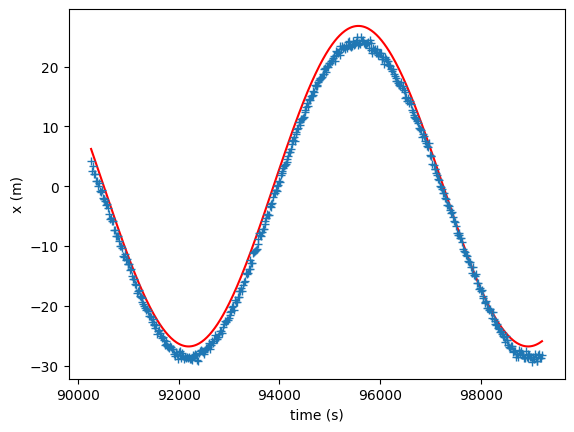

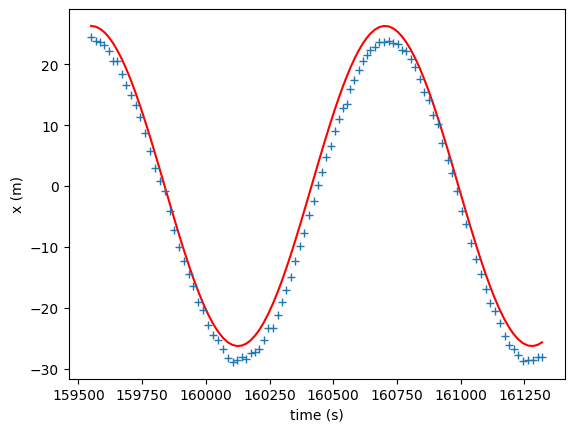

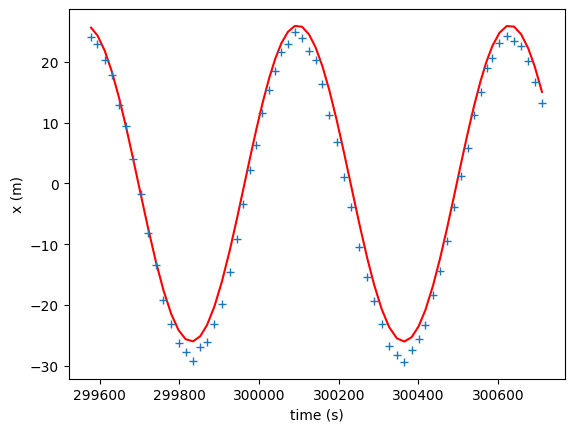

In [638]:
fitting(t1, x1, 0.001, 25, 1)
fitting(t2, x2, 0.006, 25, 1)
fitting(t3, x3, 0.008, 17,0.5)
